In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from heatmap import *
import statsmodels.api as sm
import statsmodels.formula.api as smf



data = pd.read_csv("../multiOutput/summary/newData1.tsv",
sep="\t",
dtype={'Pop':'str', 'Run':'int', 'Gen':'int', 'preAPref':'float', 'preIPref':'float', 'preOPref':'float', 'Matings':'float','Contacts':'float', 'MMContacts':'float', 'MalF':'float', 'FemF':'float', 'APref':'float', 'IPref':'float', 'OPref':'float','migrations':'float', 'A':'float', 'I':'float', 'O':'float', 'M':'float', 'F':'float', 'T':'float', 'matingSuccess':'float', 'misIdent':'float'})
data.fillna(value=0, inplace=True)
data = data.drop(data[data["Run"]==400].index)


data["maleRatio"] = data["M"]/data["T"]
data.rename(index=str, columns={"T":"Total"}, inplace=True)
data.set_index(["Pop", "Run", "Gen"], inplace=True)


In [2]:
pops = data.groupby("Pop")

finals = data.iloc[data.index.get_level_values('Gen')==100]

finalPops = finals.groupby("Pop")
for pop, popData in pops:
    print(pop, popData["Total"].max(), popData["Total"].min(), popData["Total"].mean())

1 242.0 93.0 205.1671287128713
2 238.0 78.0 202.30613861386138
3 238.0 0.0 199.22851485148516
4 333.0 4.0 201.13049504950496
5 232.0 81.0 168.343
6 233.0 46.0 158.9409
7 224.0 56.0 158.9959
8 239.0 79.0 184.1388
Total 1709.0 208.0 1471.6130693069306


## Multiple Linear Regression


### Controls

In [3]:
est = smf.ols(formula="A~I*O", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.844e+04
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:30:54   Log-Likelihood:                 1798.2
No. Observations:                 905   AIC:                            -3588.
Df Residuals:                     901   BIC:                            -3569.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9961      0.002    478.164      0.0

In [27]:
est = smf.ols(formula="I~A*O", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     25.81
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           2.53e-15
Time:                        09:56:44   Log-Likelihood:                -10.101
No. Observations:                 418   AIC:                             28.20
Df Residuals:                     414   BIC:                             44.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2595      0.022     12.043      0.0

In [28]:
est = smf.ols(formula="O~I*A", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      O   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     26.96
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           6.05e-16
Time:                        09:56:44   Log-Likelihood:                 26.682
No. Observations:                 418   AIC:                            -45.36
Df Residuals:                     414   BIC:                            -29.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2176      0.020     10.730      0.0

In [29]:
est = smf.ols(formula="Total~A:I:O", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.311
Date:                Tue, 10 Sep 2019   Prob (F-statistic):             0.0217
Time:                        09:56:44   Log-Likelihood:                -2731.1
No. Observations:                 418   AIC:                             5466.
Df Residuals:                     416   BIC:                             5474.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    212.0371      8.379     25.305      0.0

### Preference per Morph

In [4]:
est = smf.ols(formula="preAPref~A*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               preAPref   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.640e+04
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:32:11   Log-Likelihood:                 1523.0
No. Observations:                 904   AIC:                            -3038.
Df Residuals:                     900   BIC:                            -3019.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0424      0.030      1.425      

In [31]:
est = smf.ols(formula="APref~A*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  APref   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     247.9
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.46e-82
Time:                        09:56:44   Log-Likelihood:                 706.54
No. Observations:                 319   AIC:                            -1405.
Df Residuals:                     315   BIC:                            -1390.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0268      0.021     -1.300      

In [32]:
est = smf.ols(formula="preIPref~I*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               preIPref   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -105.0
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               1.00
Time:                        09:56:44   Log-Likelihood:                 10681.
No. Observations:                 319   AIC:                        -2.135e+04
Df Residuals:                     315   BIC:                        -2.134e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3333   9.11e-16   3.66e+14      

In [33]:
est = smf.ols(formula="IPref~I*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  IPref   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     166.2
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.41e-64
Time:                        09:56:44   Log-Likelihood:                 207.42
No. Observations:                 319   AIC:                            -406.8
Df Residuals:                     315   BIC:                            -391.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0374      0.165     -0.226      

In [34]:
est = smf.ols(formula="preOPref~O*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               preOPref   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -105.0
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               1.00
Time:                        09:56:44   Log-Likelihood:                 10722.
No. Observations:                 319   AIC:                        -2.144e+04
Df Residuals:                     315   BIC:                        -2.142e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3333   9.96e-16   3.35e+14      

In [35]:
est = smf.ols(formula="OPref~O*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  OPref   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     166.5
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.14e-64
Time:                        09:56:44   Log-Likelihood:                 207.57
No. Observations:                 319   AIC:                            -407.1
Df Residuals:                     315   BIC:                            -392.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0420      0.206     -0.204      

In [36]:
est = smf.ols(formula="FemF~A*Total", data=finals).fit()
print(est.summary())

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\regression\linear_model.py:1594: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invali

                            OLS Regression Results                            
Dep. Variable:                   FemF   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                nan
Time:                        09:56:44   Log-Likelihood:                    inf
No. Observations:                 418   AIC:                              -inf
Df Residuals:                     414   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0          0        nan        n

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\stats\stattools.py:47: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [37]:
est = smf.ols(formula="FemF~(A:I)+Total", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   FemF   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                nan
Time:                        09:56:44   Log-Likelihood:                    inf
No. Observations:                 418   AIC:                              -inf
Df Residuals:                     415   BIC:                              -inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0          0        nan        n

In [38]:
est = smf.ols(formula="MalF~(A:I:O)+Total", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MalF   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                nan
Time:                        09:56:44   Log-Likelihood:                    inf
No. Observations:                 418   AIC:                              -inf
Df Residuals:                     415   BIC:                              -inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0          0        nan        n

# Plots

## Correlation

ValueError: cannot convert float NaN to integer

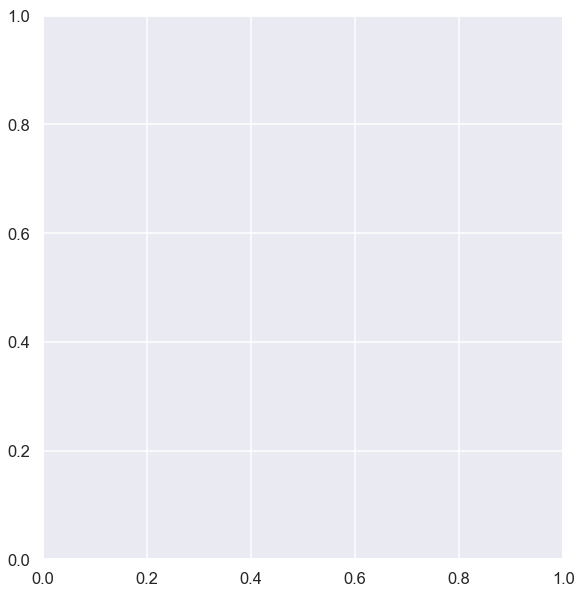

In [5]:
sns.set_context("talk")
sns.set_style("darkgrid")
corr = data.corr()
plt.figure(figsize=(10,10))
corrplot(data.corr())
plt.subplots_adjust(left=0.2, bottom=0.2)

## Correlation Per Population

ValueError: cannot convert float NaN to integer

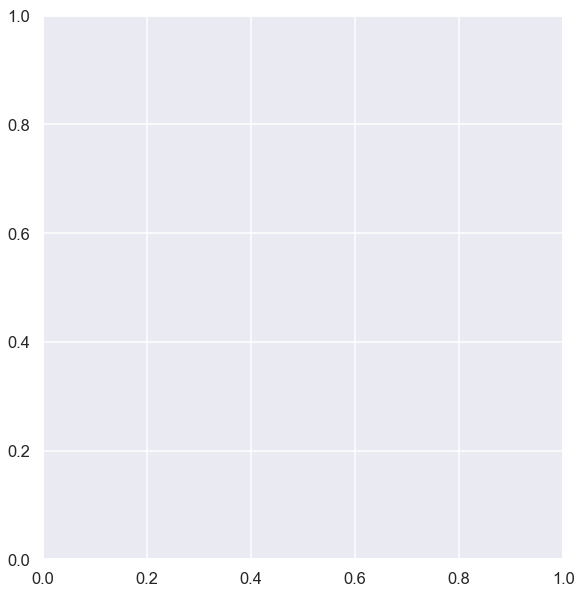

In [6]:
for pop, popData in pops:
    sns.set_style("darkgrid")
    plt.figure(figsize=(10,10))
    corrplot(popData.corr())
    plt.subplots_adjust(left=0.2, bottom=0.2)
    

## Preference vs. Frequency

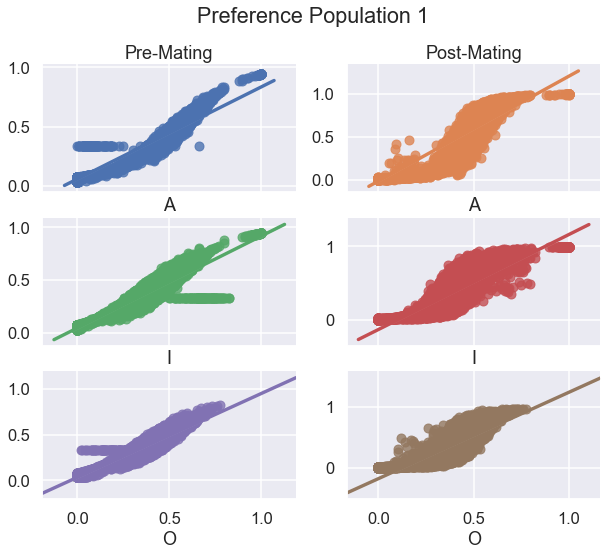

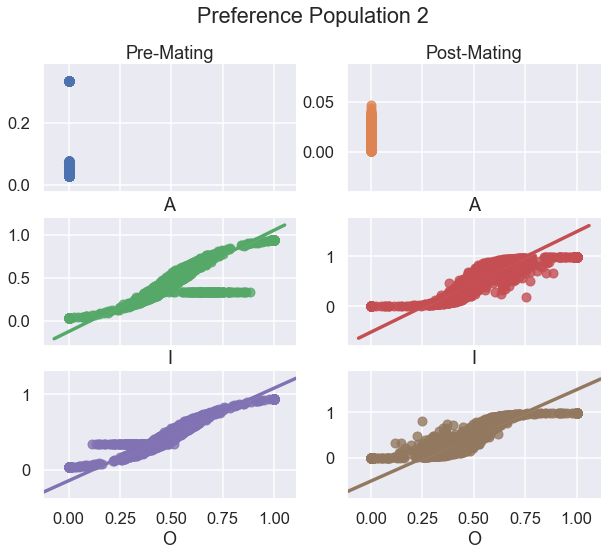

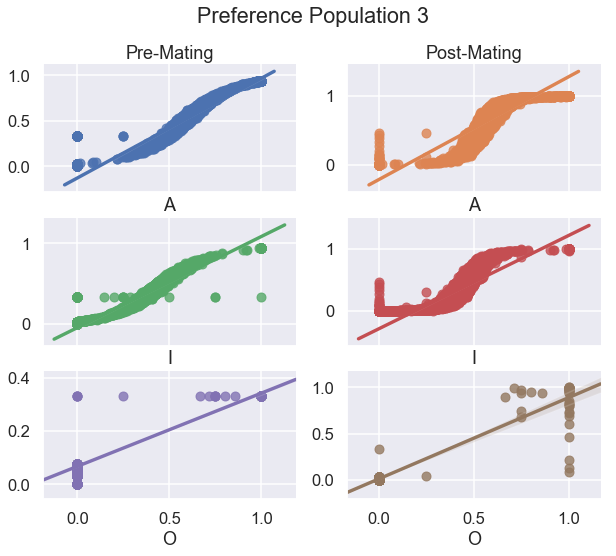

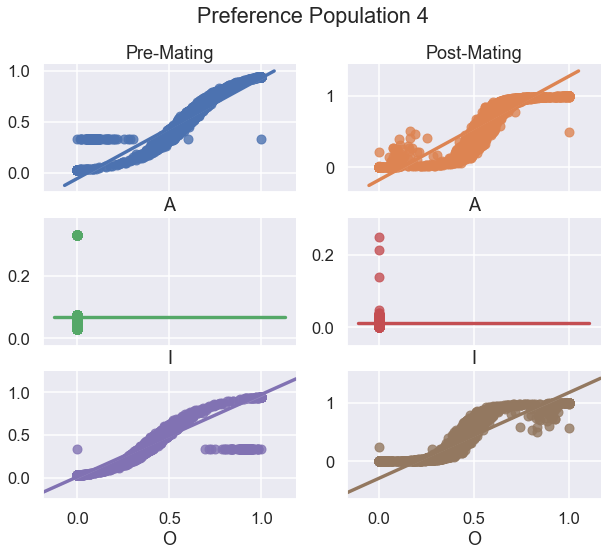

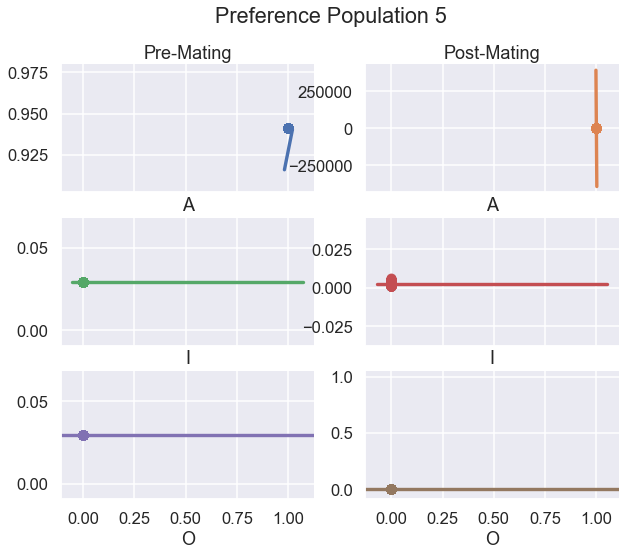

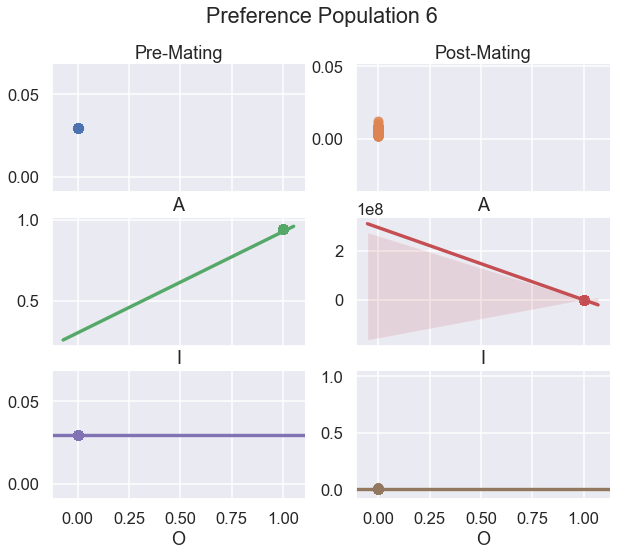

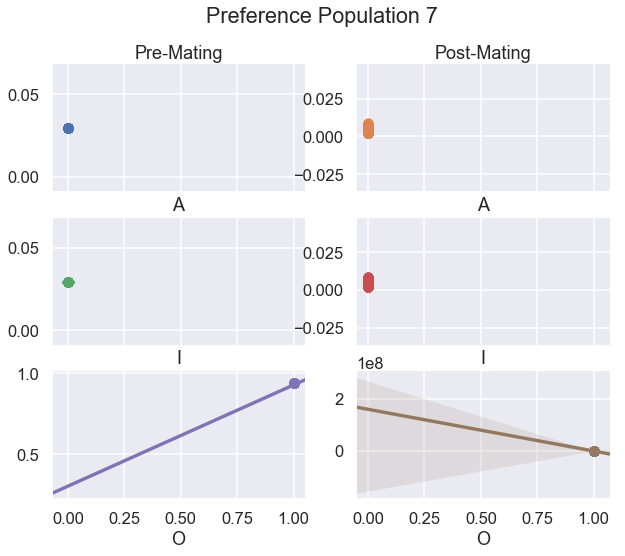

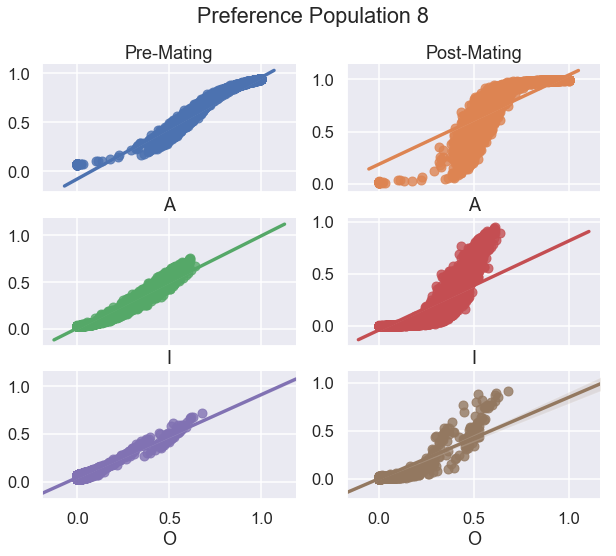

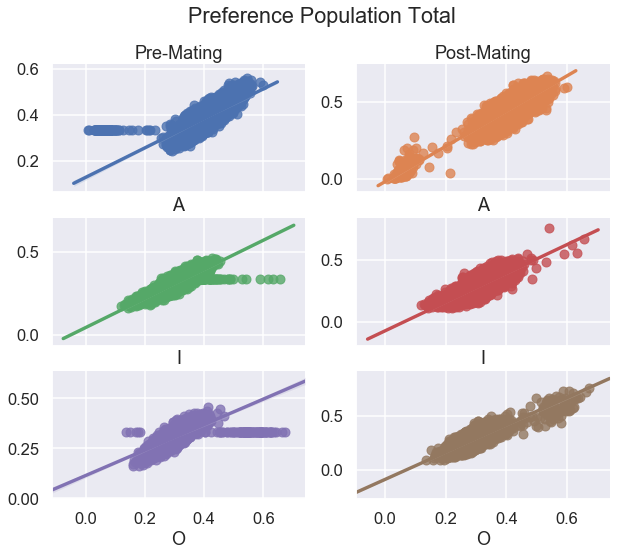

In [7]:
for pop, popData in pops:
    fig, axarr = plt.subplots(3,2, sharex ='col', sharey=False, figsize=(10,8))
    fig.suptitle("Preference Population "+pop)
    plot1 = sns.regplot(x="A", y="preAPref", data=popData, ax=axarr[0,0])
    plot1.set(ylabel="")
    plot1.set_title("Pre-Mating")
    plot2 = sns.regplot(x="A", y="APref", data=popData, ax=axarr[0,1])
    plot2.set(ylabel="")
    plot2.set_title("Post-Mating")
    plot3 = sns.regplot(x="I", y="preIPref", data=popData, ax=axarr[1,0])
    plot3.set(ylabel="")
    plot4 = sns.regplot(x="I", y="IPref", data=popData, ax=axarr[1,1])
    plot4.set(ylabel="")
    plot5 = sns.regplot(x="O", y="preOPref", data=popData, ax=axarr[2,0])
    plot5.set(ylabel="")
    plot6 = sns.regplot(x="O", y="OPref", data=popData, ax=axarr[2,1])
    plot6.set(ylabel="")
    sns.despine()

## Fertility Per Population

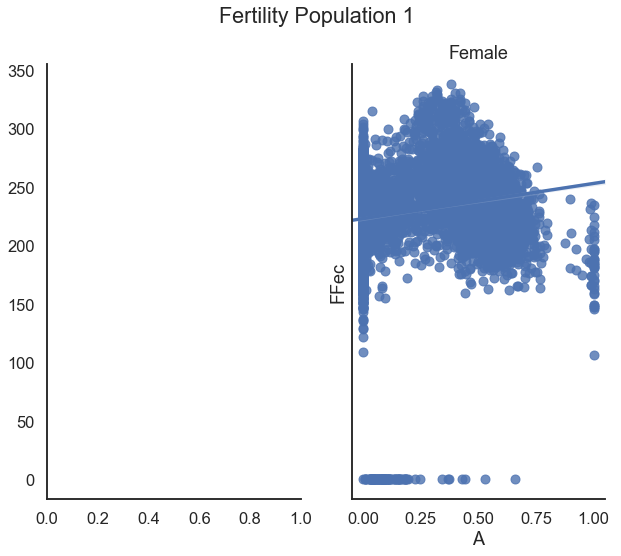

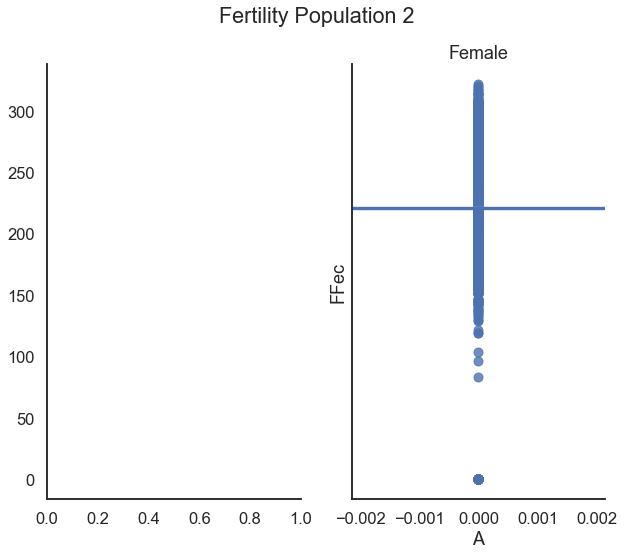

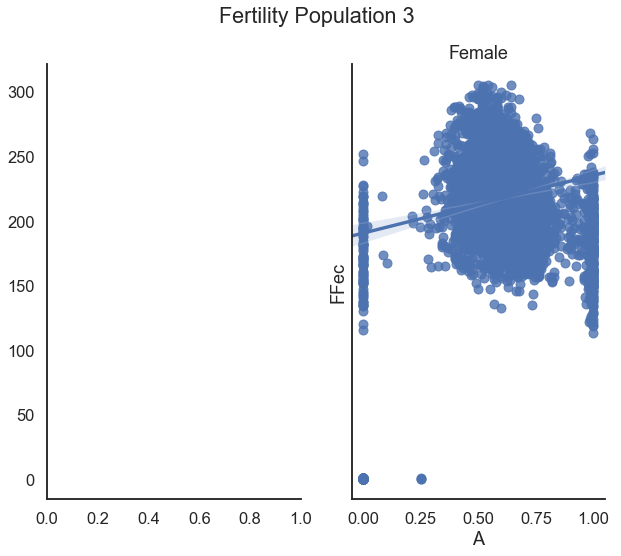

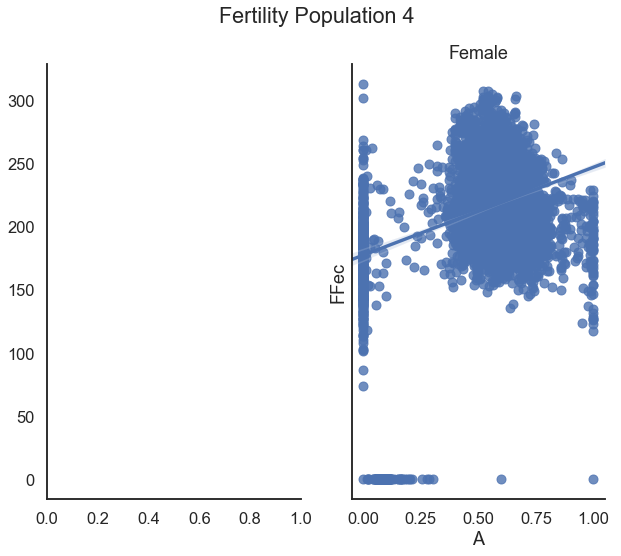

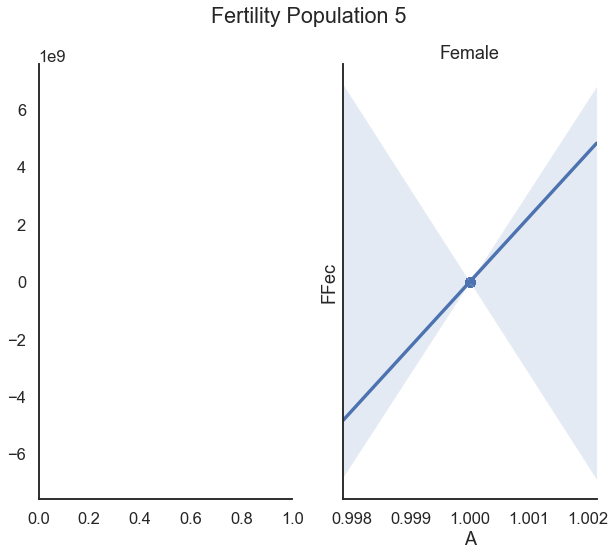

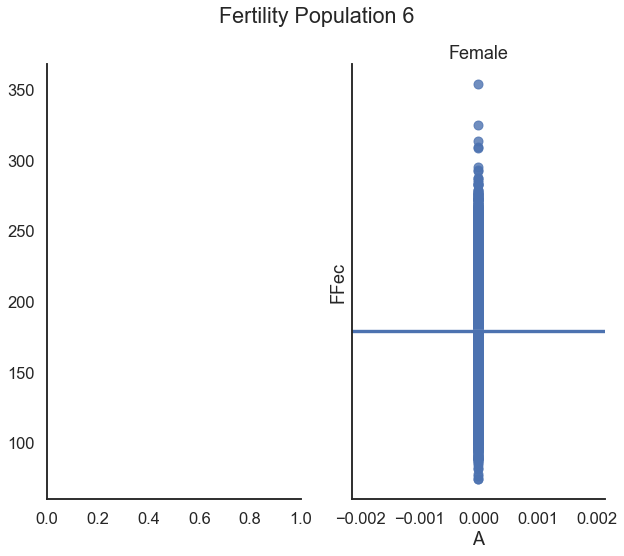

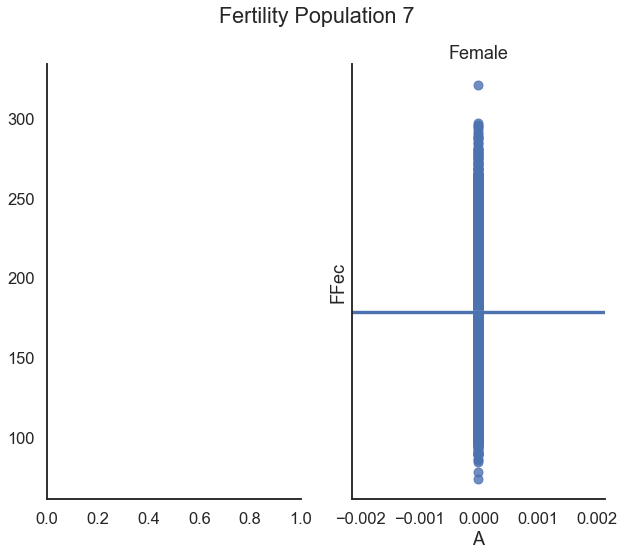

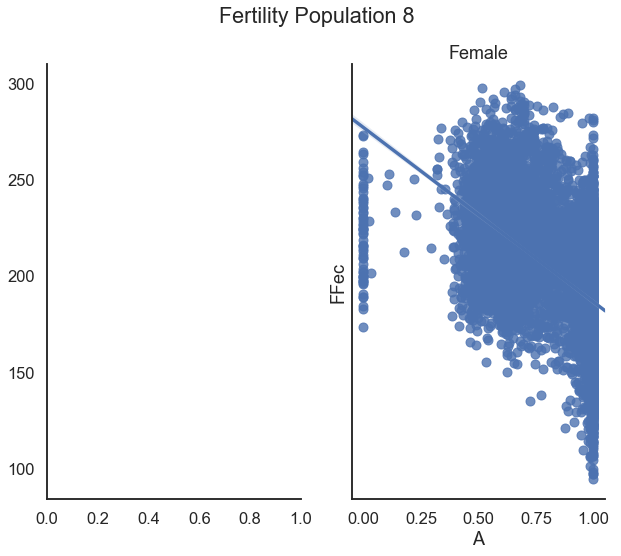

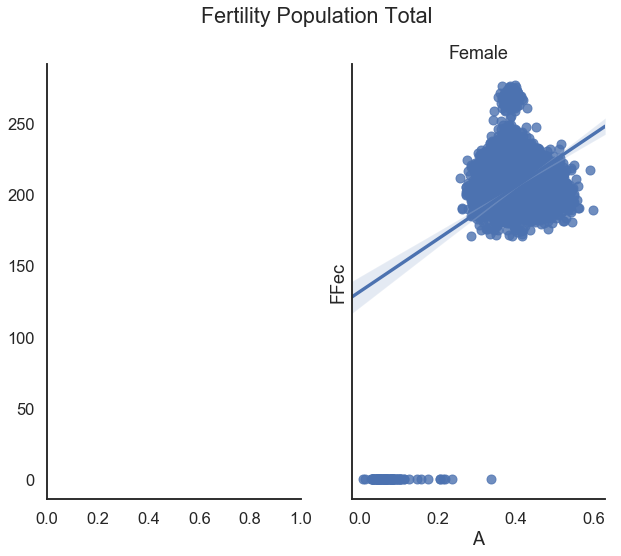

In [9]:
for pop, popData in pops:
    sns.set_style("white")
    fig, axarr = plt.subplots(1,2, sharey=True, figsize=(10,8))
    #plot1 = sns.regplot(x="A", y="MalF", data=popData,ax=axarr[0])
    #plot1.set_title("Male")
    plot2 = sns.regplot(x="A", y="FFec", data=popData, ax=axarr[1])
    plot2.set_title("Female")
    sns.despine()
    fig.suptitle("Fertility Population "+pop)

## Male-male Interactions

In [ ]:
for pop, popData in pops:
    fig = plt.figure(figsize=(10,8))
    plot = sns.regplot(x="A", y="misIdent", data=popData)
    fig.suptitle("Population "+pop)
    sns.despine()

## Sex Distribution

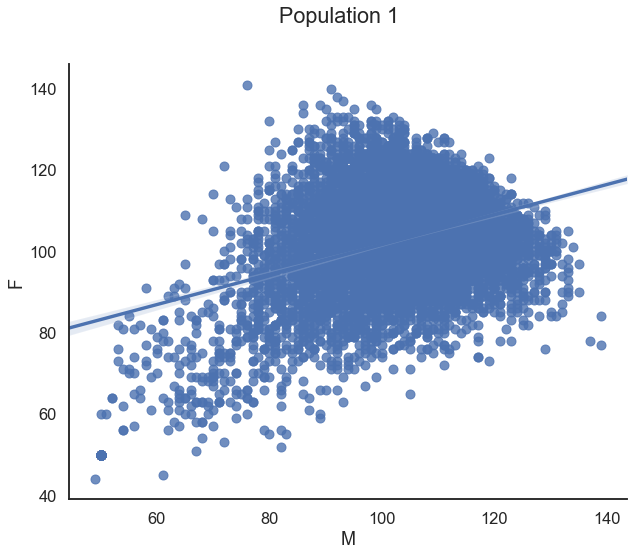

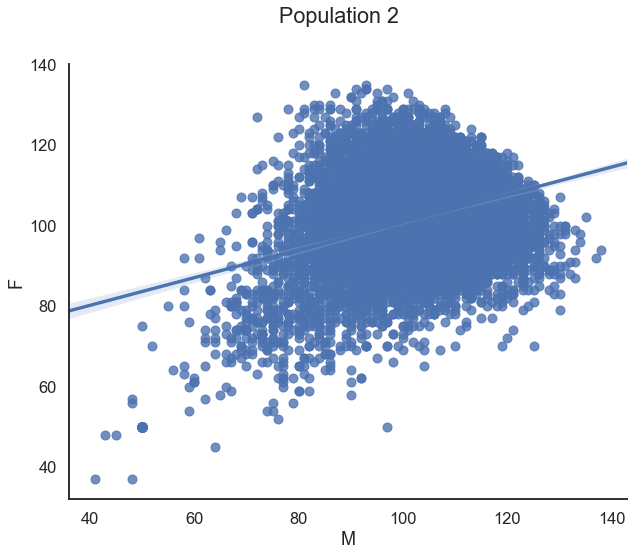

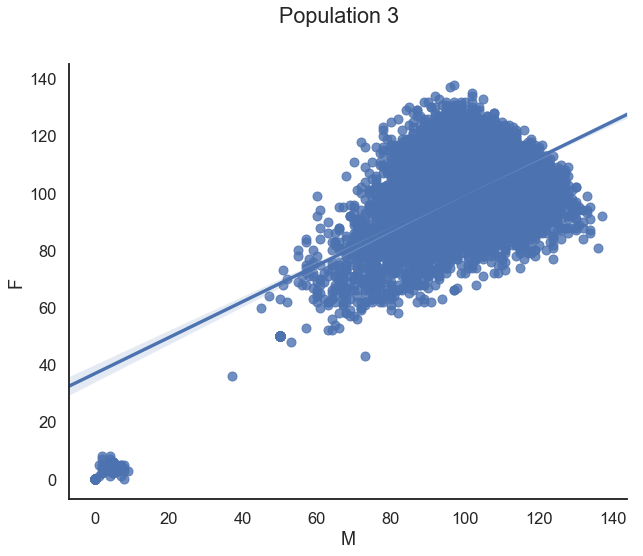

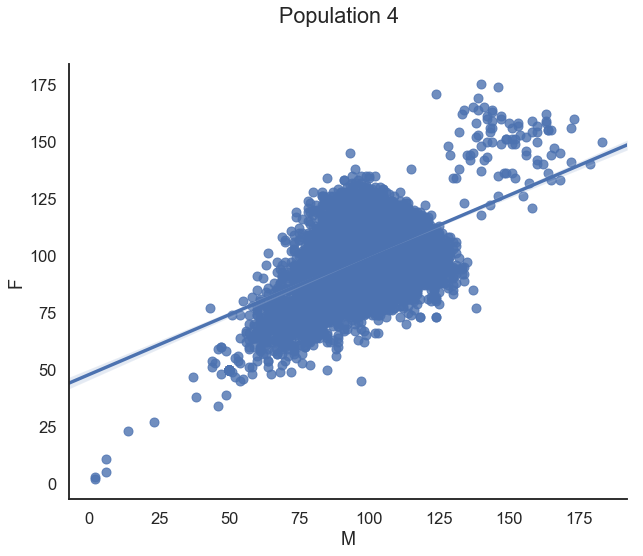

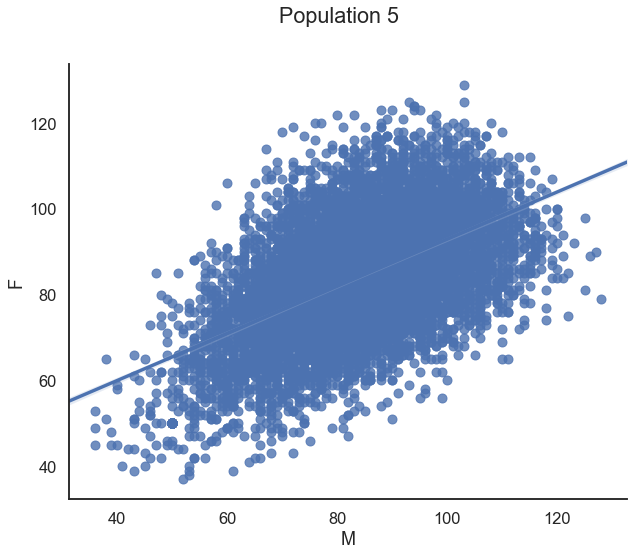

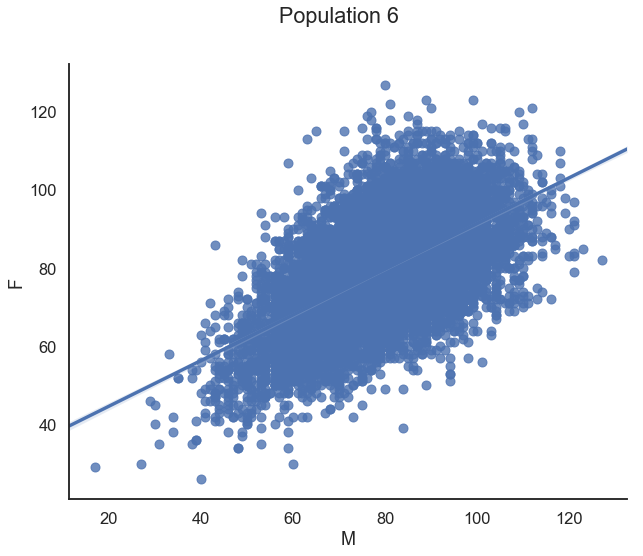

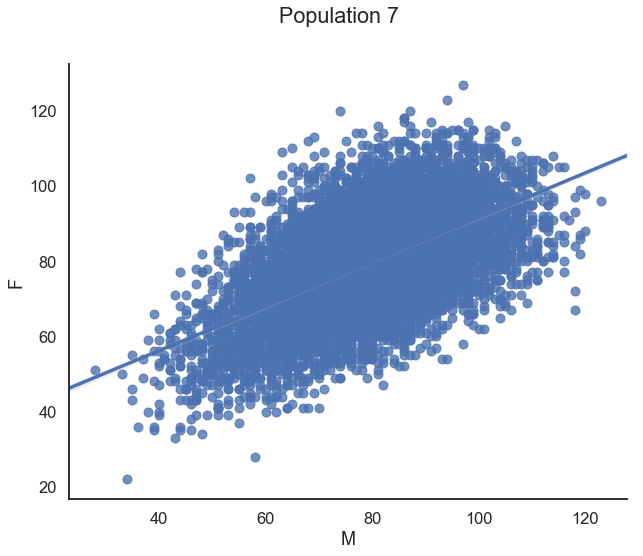

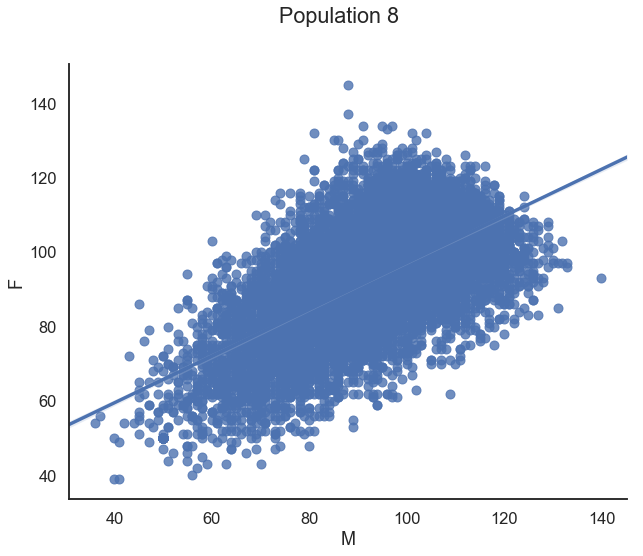

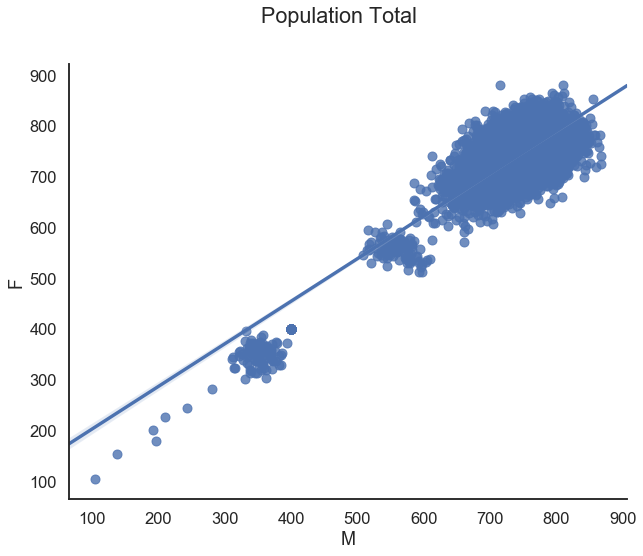

In [10]:
for pop, popData in pops:
    fig = plt.figure(figsize=(10,8))
    plot = sns.regplot(x="M", y="F", data=popData)
    fig.suptitle("Population "+pop)

    sns.despine()

## Migration

In [ ]:
for pop, popData in pops:
    fig = plt.figure(figsize=(10,8))
    plot = sns.regplot(x="Total", y="migrations", data=popData)
    fig.suptitle("Population "+pop)
    sns.despine()

## Multiple Regression

In [11]:
from mpl_toolkits.mplot3d import Axes3D
X = data[["A", "I"]]
print(X.describe())
y = data["O"]
print(y.describe())
X = sm.add_constant(X)
est = sm.OLS(y,X, missing='drop').fit()
print(est.summary())


                  A             I
count  90500.000000  90500.000000
mean       0.398126      0.309385
std        0.368660      0.318740
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.428571      0.304920
75%        0.637931      0.468750
max        1.000000      1.000000
count    90500.000000
mean         0.291981
std          0.327572
min          0.000000
25%          0.000000
50%          0.265036
75%          0.469565
max          1.000000
Name: O, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      O   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 9.535e+06
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:37:30   Log-Likelihood:             2.1491e+05
No. Observations:   

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0.5, 0, 'O')

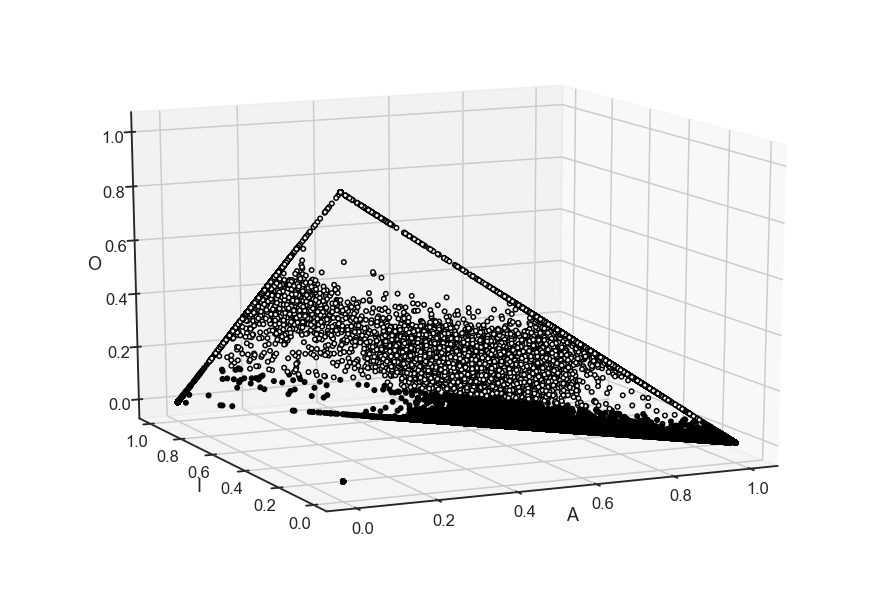

In [12]:
xx1, xx2 = np.meshgrid(np.linspace(X.A.min(), X.A.max(), 100), np.linspace(X.I.min(), X.I.max(), 100))
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

resid = y - est.predict(X)

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

#surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.winter, alpha=0.6, linewidth=0)

ax.scatter(X[resid >= 0].A, X[resid >= 0].I, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].A, X[resid < 0].I, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('A')
ax.set_ylabel('I')
ax.set_zlabel('O')


## Ipyvolume testing

In [13]:
import ipyvolume as ipv
ipv.figure(width=500, height=500, controls=True)
ipv.xyzlabel("A","I", "O")
ipv.scatter(data["A"], data["I"], data["O"], size=1, color="red", marker="sphere")
ipv.style.set_style_dark()
ipv.style.background_color("lime")
ipv.show()

## Bokeh Testing

In [14]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, CDSView, GroupFilter
output_notebook()
p = figure(title="Test", x_axis_label="Males", y_axis_label="Females")
source = ColumnDataSource(finals.reset_index())
pop1 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="1")])
pop2 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="2")])
pop3 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="3")])
pop4 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="4")])
totalPop = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="Total")])

colors = {"1": "red", "2": "blue", "3": "green", "4": "yellow", "Total": "black"}
p.circle(x="M", y="F", legend=None, line_color="red", color = "red", source = source, view=pop1)
p.circle(x="M", y="F", legend=None, line_color="blue", color = "blue", source = source, view=pop2)
p.circle(x="M", y="F", legend=None, line_color="green", color = "green", source = source, view=pop3)
p.circle(x="M", y="F", legend=None, line_color="yellow", color = "yellow", source = source, view=pop4)
p.circle(x="M", y="F", legend=None, line_color="black", color = "black", source = source, view=totalPop)

for pop, popData in pops:
    par = np.polyfit(popData["M"], popData["F"], 1, full=True)
    slope = par[0][0]
    intercept = par[0][1]
    y_predicted = [slope*i + intercept for i in popData["M"]]
    p.line(popData["M"],y_predicted, color=colors[pop], legend='F='+str(round(slope,2))+'M+'+str(round(intercept,2)))

show(p)


Loading BokehJS ...

KeyError: '5'

In [15]:
p = figure(title="A vs I", x_axis_label="A", y_axis_label="I")

colors = {"1": "red", "2": "blue", "3": "green", "4": "yellow", "Total": "black"}
p.circle(x="A", y="I", legend=None, line_color="red", color = "red", source = source, view=pop1)
p.circle(x="A", y="I", legend=None, line_color="blue", color = "blue", source = source, view=pop2)
p.circle(x="A", y="I", legend=None, line_color="green", color = "green", source = source, view=pop3)
p.circle(x="A", y="I", legend=None, line_color="yellow", color = "yellow", source = source, view=pop4)
p.circle(x="A", y="I", legend=None, line_color="black", color = "black", source = source, view=totalPop)

for pop, popData in pops:
    par = np.polyfit(popData["A"], popData["I"], 1, full=True)
    slope = par[0][0]
    intercept = par[0][1]
    y_predicted = [slope*i + intercept for i in popData["A"]]
    p.line(popData["A"],y_predicted, color=colors[pop], legend='I='+str(round(slope,2))+'A+'+str(round(intercept,2)))

show(p)

p = figure(title="A vs I all Pops", x_axis_label="A", y_axis_label="I")
p.circle(x="A", y="I", legend=None, source=source)
par = np.polyfit(finals["A"], finals["I"], 1, full=True)
slope=par[0][0]
intercept = par[0][1]
y_predicted = [slope*i + intercept for i in finals["A"]]
p.line(finals["A"], y_predicted, legend="I= "+str(round(slope,2))+"A+"+str(round(intercept,2)))
show(p)


c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

In [16]:
p = figure(title="A vs O", x_axis_label="A", y_axis_label="O")

colors = {"1": "red", "2": "blue", "3": "green", "4": "yellow", "Total": "black"}
p.circle(x="A", y="O", legend=None, line_color="red", color = "red", source = source, view=pop1)
p.circle(x="A", y="O", legend=None, line_color="blue", color = "blue", source = source, view=pop2)
p.circle(x="A", y="O", legend=None, line_color="green", color = "green", source = source, view=pop3)
p.circle(x="A", y="O", legend=None, line_color="yellow", color = "yellow", source = source, view=pop4)
p.circle(x="A", y="O", legend=None, line_color="black", color = "black", source = source, view=totalPop)

for pop, popData in pops:
    par = np.polyfit(popData["A"], popData["O"], 1, full=True)
    slope = par[0][0]
    intercept = par[0][1]
    y_predicted = [slope*i + intercept for i in popData["A"]]
    p.line(popData["A"],y_predicted, color=colors[pop], legend='O='+str(round(slope,2))+'A+'+str(round(intercept,2)))

show(p)

p = figure(title="A vs O all Pops", x_axis_label="A", y_axis_label="O")
p.circle(x="A", y="O", legend=None, source=source)
par = np.polyfit(finals["A"], finals["O"], 1, full=True)
slope=par[0][0]
intercept = par[0][1]
y_predicted = [slope*i + intercept for i in finals["A"]]
p.line(finals["A"], y_predicted, legend="O= "+str(round(slope,2))+"A+"+str(round(intercept,2)))
show(p)


LinAlgError: SVD did not converge in Linear Least Squares

In [17]:
p = figure(title="O vs I", x_axis_label="O", y_axis_label="I")

colors = {"1": "red", "2": "blue", "3": "green", "4": "yellow", "Total": "black"}
p.circle(x="O", y="I", legend=None, line_color="red", color = "red", source = source, view=pop1)
p.circle(x="O", y="I", legend=None, line_color="blue", color = "blue", source = source, view=pop2)
p.circle(x="O", y="I", legend=None, line_color="green", color = "green", source = source, view=pop3)
p.circle(x="O", y="I", legend=None, line_color="yellow", color = "yellow", source = source, view=pop4)
p.circle(x="O", y="I", legend=None, line_color="black", color = "black", source = source, view=totalPop)

for pop, popData in pops:
    par = np.polyfit(popData["O"], popData["I"], 1, full=True)
    slope = par[0][0]
    intercept = par[0][1]
    y_predicted = [slope*i + intercept for i in popData["O"]]
    p.line(popData["O"],y_predicted, color=colors[pop], legend='I='+str(round(slope,2))+'O+'+str(round(intercept,2)))

show(p)

p = figure(title="O vs I all Pops", x_axis_label="O", y_axis_label="I")
p.circle(x="O", y="I", legend=None, source=source)
par = np.polyfit(finals["O"], finals["I"], 1, full=True)
slope=par[0][0]
intercept = par[0][1]
y_predicted = [slope*i + intercept for i in finals["O"]]
p.line(finals["O"], y_predicted, legend="I= "+str(round(slope,2))+"O+"+str(round(intercept,2)))
show(p)


LinAlgError: SVD did not converge in Linear Least Squares